In [ ]:
import pandas as pd

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
df = pd.read_csv("Anantapur.csv")

In [ ]:
df.head()

,STATE,DISTRICT,QTR,YR,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,Relapse Male,Relapse Female,NSN Male/NewClinDiag Male,NSN Female/NewClinDiag Female,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,0-14 yrs NSP(NewAll207+) Female,15-24 yrs NSP(NewAll207+) Male,15-24 yrs NSP(NewAll207+) Female,25-34 yrs NSP(NewAll207+) Male,25-34 yrs NSP(NewAll207+) Female,35-44 yrs NSP(NewAll207+) Male,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,SumOfHIV_Tested,SumOfHIV_infected
0,Andhra Pradesh,ANANTAPUR,1,2008,529,181,710,82,12,319,132,105,73,2.0,3.0,64.0,46.0,89.0,49.0,98.0,32.0,118.0,30.0,105.0,16.0,53.0,5.0,199.0,50.0
1,Andhra Pradesh,ANANTAPUR,2,2008,524,204,728,70,21,201,129,89,84,2.0,9.0,63.0,46.0,79.0,49.0,100.0,45.0,118.0,24.0,104.0,23.0,58.0,8.0,170.0,68.0
2,Andhra Pradesh,ANANTAPUR,3,2008,502,162,664,75,15,179,112,91,73,1.0,4.0,63.0,20.0,76.0,50.0,107.0,35.0,108.0,28.0,102.0,18.0,45.0,7.0,263.0,73.0
3,Andhra Pradesh,ANANTAPUR,4,2008,481,194,675,55,22,193,113,90,62,0.0,3.0,57.0,50.0,70.0,46.0,86.0,41.0,116.0,21.0,78.0,21.0,74.0,12.0,369.0,72.0
4,Andhra Pradesh,ANANTAPUR,1,2009,527,195,722,73,14,249,127,94,73,4.0,6.0,50.0,42.0,104.0,51.0,94.0,32.0,109.0,34.0,102.0,25.0,64.0,5.0,605.0,109.0


In [ ]:
raw_seq = df['NSP Total/ NewMicConf Total']

In [ ]:
n_steps = 8

In [ ]:
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
n_features = 1

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
resArray = list(X[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray.append(model.predict(x_input, verbose=0))


In [ ]:
range1 = pd.date_range(start='1/1/2008', periods=44, freq='Q')

In [ ]:
range2 = pd.date_range(start='1/1/2019', periods=24, freq='Q')

In [ ]:
output = array(resArray[8:]).flatten()

In [ ]:
import matplotlib.pyplot as plt

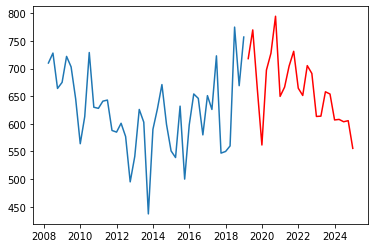

In [ ]:
plt.plot(range1 , raw_seq)
plt.plot(range2 , output , 'r')

In [ ]:
result = pd.DataFrame(output , columns = ['NSP Total'])

In [ ]:
result['Year'] = range2

In [ ]:
raw_seq2 = df['Relapse Male'] + df['Relapse Female']

In [ ]:
X2, y2 = split_sequence(raw_seq2, n_steps)

In [ ]:
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))

In [ ]:
model.fit(X2, y2, epochs=1000, verbose=0)

In [ ]:
resArray2 = list(X2[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray2[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray2.append(model.predict(x_input, verbose=0))


In [ ]:
output = array(resArray2[8:]).flatten()

In [ ]:
result['Relapse Total'] = output

In [ ]:
raw_seq3 = df['NSN Male/NewClinDiag Male'] + df['NSN Female/NewClinDiag Female']

In [ ]:
X3, y3 = split_sequence(raw_seq3, n_steps)

In [ ]:
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

In [ ]:
model.fit(X3, y3, epochs=1000, verbose=0)

In [ ]:
resArray3 = list(X3[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray3[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray3.append(model.predict(x_input, verbose=0))


In [ ]:
output = array(resArray3[8:]).flatten()

In [ ]:
result['NSN Total'] = output

In [ ]:
result['State'] = 'Andhra Pradesh'

In [ ]:
result['District'] = 'Anantapur'

In [ ]:
result

,NSP Total,Year,Relapse Total,NSN Total,State,District
0,717.975586,2019-03-31,51.212509,222.665756,Andhra Pradesh,Anantapur
1,769.906433,2019-06-30,53.407024,231.116425,Andhra Pradesh,Anantapur
2,662.807373,2019-09-30,44.404057,228.770691,Andhra Pradesh,Anantapur
3,561.690735,2019-12-31,40.368797,331.477448,Andhra Pradesh,Anantapur
4,697.235168,2020-03-31,47.737610,260.660431,Andhra Pradesh,Anantapur
5,727.795166,2020-06-30,42.549442,305.552338,Andhra Pradesh,Anantapur
6,794.640808,2020-09-30,41.691280,296.155029,Andhra Pradesh,Anantapur
7,649.653870,2020-12-31,38.951332,210.888855,Andhra Pradesh,Anantapur
8,666.399780,2021-03-31,41.525036,252.662216,Andhra Pradesh,Anantapur
9,704.539124,2021-06-30,37.621136,223.972961,Andhra Pradesh,Anantapur


In [ ]:
result.to_csv('AnantapurPred.csv' , index = False)